# Project: Investigate Medical Appointments Data

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction


In [5]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

### Dataset introduction
This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row.

1. PatientId : Identification of a patient
2. AppointmentID : Identification of an appointment
3. Gender : Male or Female
4. ScheduledDay: The day someone called or registered the appointment.
5. AppointmentDay: The day of the actuall appointment, when they have to visit the doctor.
6. Age: How old is the patient.
7. Neighbourhood: Where the appointment takes place.
8. Scholarship: 0 or 1, indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família.
9. Hipertension: 0 or 1
10. Diabetes: 0 or 1
11. Alcoholism: 0 or 1
12. Handcap: different level of handcap, 0 to 4
13. SMS_received: 1 or more messages sent to the patient.
14. No-show: ‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up.

### Questions of interest 

1. Does the day of week affect the number of no-show appointments?
2. Does age affect the likelihood of no-show appointments?
3. Does particapting in scholarship program affect patient absense?
4. Does Alcoholismaffect patient absense?
5. Does handcap level impacts the number of absense?
6. Do SMS reminders actually decrease the number of absences?
7. Are chronic illnesses like hypertension and diabetes affecting patient's absences?

<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [23]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
data = pd.read_csv("/Users/xiangyuli/Desktop/Udacity - DA/Session 2 - Intro to data analysis/Project 2 - Investigate a dataset/Result/noshowappointments-kagglev2-may-2016.csv")
data.head()
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [24]:
# Print number of unique values to see if there's entities that doesn't make sense
for i in data.columns[2:14]:
    print(i, data[i].unique())

Gender ['F' 'M']
ScheduledDay ['2016-04-29T18:38:08Z' '2016-04-29T16:08:27Z' '2016-04-29T16:19:04Z' ...
 '2016-04-27T16:03:52Z' '2016-04-27T15:09:23Z' '2016-04-27T13:30:56Z']
AppointmentDay ['2016-04-29T00:00:00Z' '2016-05-03T00:00:00Z' '2016-05-10T00:00:00Z'
 '2016-05-17T00:00:00Z' '2016-05-24T00:00:00Z' '2016-05-31T00:00:00Z'
 '2016-05-02T00:00:00Z' '2016-05-30T00:00:00Z' '2016-05-16T00:00:00Z'
 '2016-05-04T00:00:00Z' '2016-05-19T00:00:00Z' '2016-05-12T00:00:00Z'
 '2016-05-06T00:00:00Z' '2016-05-20T00:00:00Z' '2016-05-05T00:00:00Z'
 '2016-05-13T00:00:00Z' '2016-05-09T00:00:00Z' '2016-05-25T00:00:00Z'
 '2016-05-11T00:00:00Z' '2016-05-18T00:00:00Z' '2016-05-14T00:00:00Z'
 '2016-06-02T00:00:00Z' '2016-06-03T00:00:00Z' '2016-06-06T00:00:00Z'
 '2016-06-07T00:00:00Z' '2016-06-01T00:00:00Z' '2016-06-08T00:00:00Z']
Age [ 62  56   8  76  23  39  21  19  30  29  22  28  54  15  50  40  46   4
  13  65  45  51  32  12  61  38  79  18  63  64  85  59  55  71  49  78
  31  58  27   6   2  11   7 

### Data Cleaning

In [25]:
# Convert ScheduledDay and AppointmentDay to datetime type
data['AppointmentDay'] = pd.to_datetime(data['AppointmentDay'])
data['ScheduledDay'] = pd.to_datetime(data['ScheduledDay'])

# Convert patient id into int
data['PatientId'] = data['PatientId'].astype(int)

# Create day of week column of appointment
data['DayOfWeek'] = pd.to_datetime(data['AppointmentDay']).dt.day_name()

In [26]:
data[(data['Age']== -1)]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,DayOfWeek
99832,465943158731293,5775010,F,2016-06-06 08:58:13+00:00,2016-06-06 00:00:00+00:00,-1,ROMÃO,0,0,0,0,0,0,No,Monday


In [27]:
# There's only one record shows age of -1, so treating this as wrong input and delete the row from dataset
cleaned = data[(data['Age'] != -1)]

In [28]:
cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110526 entries, 0 to 110526
Data columns (total 15 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   PatientId       110526 non-null  int64              
 1   AppointmentID   110526 non-null  int64              
 2   Gender          110526 non-null  object             
 3   ScheduledDay    110526 non-null  datetime64[ns, UTC]
 4   AppointmentDay  110526 non-null  datetime64[ns, UTC]
 5   Age             110526 non-null  int64              
 6   Neighbourhood   110526 non-null  object             
 7   Scholarship     110526 non-null  int64              
 8   Hipertension    110526 non-null  int64              
 9   Diabetes        110526 non-null  int64              
 10  Alcoholism      110526 non-null  int64              
 11  Handcap         110526 non-null  int64              
 12  SMS_received    110526 non-null  int64              
 13  No-show       

<a id='eda'></a>
## Exploratory Data Analysis

#### In this session, we are going to look at number of no-show appointments and appointment show up rate by different features of the data in order to answer the questions.

In [13]:
# check the probability of showing up vs different features
def probShowUp(dataset, group_by, plot_kind):
    df = pd.crosstab(index = dataset[group_by], columns = dataset['No-show']).reset_index()
    df['showup_percent'] = df['No'] / (df['Yes'] + df['No'])
    # Plot chart of showup percentage vs group by axis
    df.plot(x=group_by,y='showup_percent',kind=plot_kind,figsize=(20,5))
    plt.title(group_by + " vs paitinet show up percentage")


In [14]:
# check the number of show up vs not show up, by different features
def numShowUp(dataset, group_by, plot_kind):
    df = pd.crosstab(index = dataset[group_by], columns = dataset['No-show']).reset_index()
    # Plot chart of showup percentage vs group by axis
    df.plot(x=group_by,y=['Yes','No'],kind=plot_kind,figsize=(20,5))
    plt.title(group_by + " vs Number of paitinet show up")

### Question 1:  Does the day of week affect the number of no-show appointments?

Below charts show very few appointments on saturday and no appointments on sunday. Also thursday shows less appointments. There's no clear pattern or trend from the day of week which can strongly indicate whether a patient will show up or not.


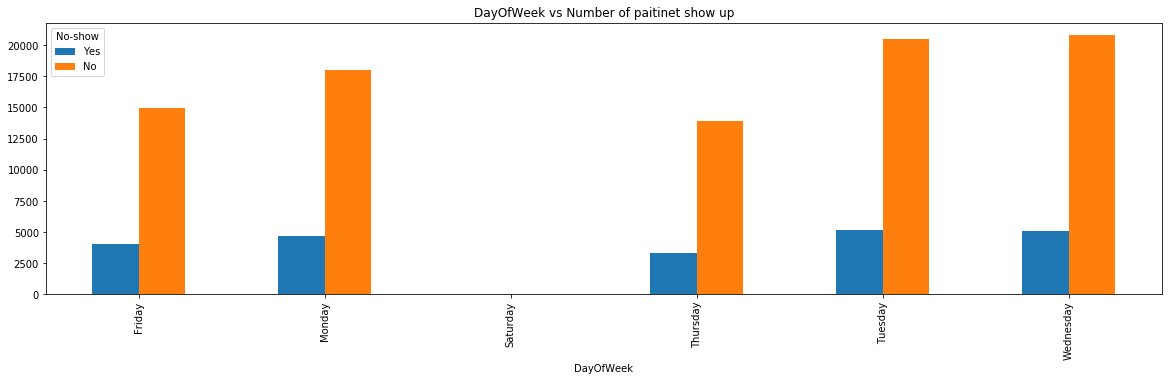

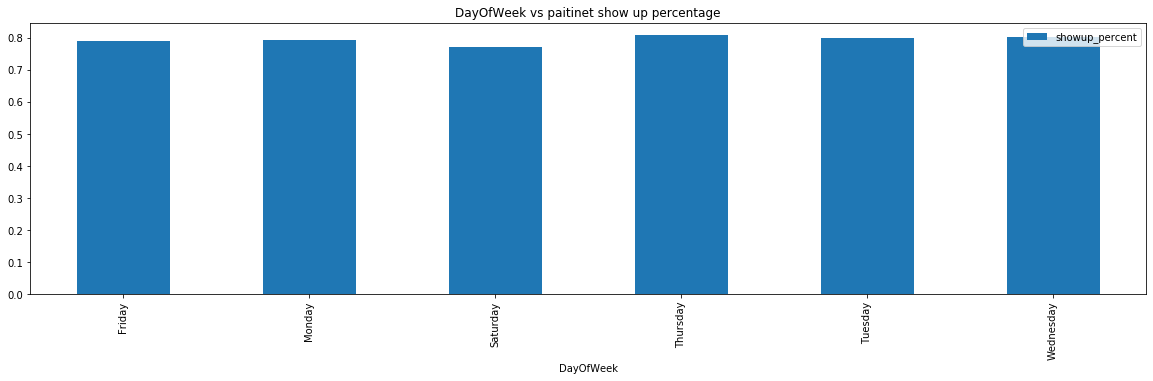

In [29]:
numShowUp(cleaned,'DayOfWeek','bar')
probShowUp(cleaned,'DayOfWeek','bar')

### Question 2: Does age affect the likelihood of no-show appointments?

Below charts trend that with age increase, the show up appointments percentage slightly increase and the show up percentage range from 70% to 80%. This trend could indicate that age is an important indicator to predict if a patient will show up 

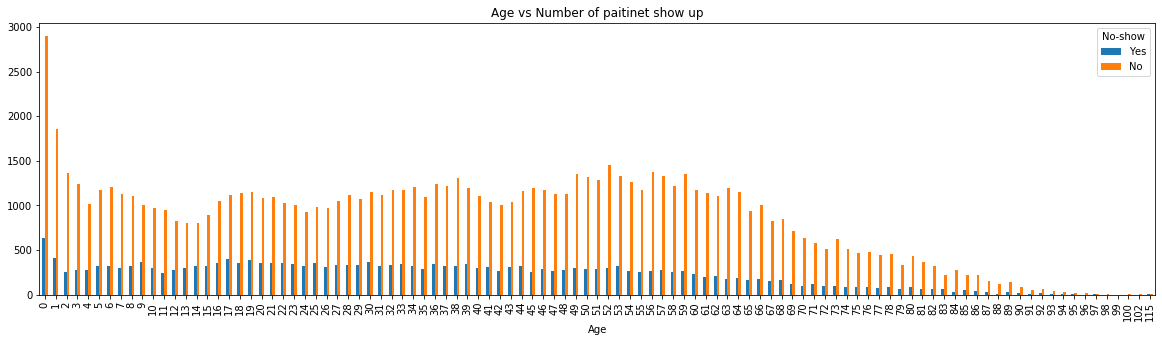

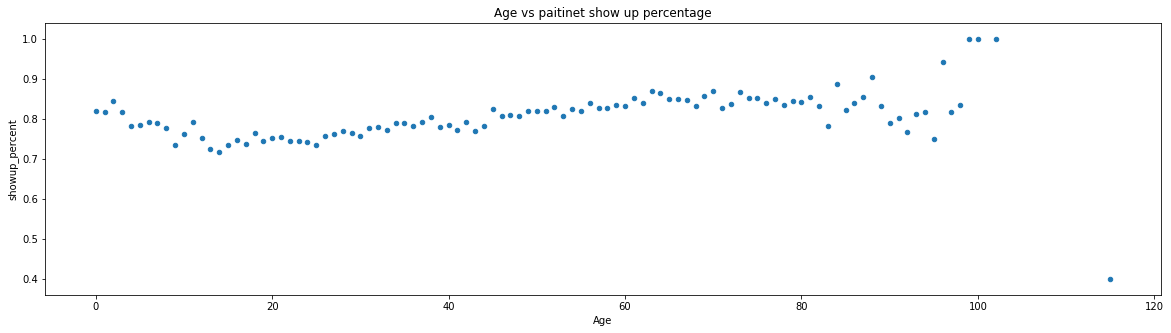

In [30]:
numShowUp(cleaned,'Age','bar')
probShowUp(cleaned,'Age','scatter')

### Question 3: Does particapting in scholarship program affect patient absense?

Looking at scholarship metric we are assuming people who enrolled in the program may have higher chance show up in appointments. The charts show the opposite. Out of the 10,500 patients with Scholarship around 75% of them have come for the visit. People who did not participate in the scholarship program actually have a higher show up percentage of 80%. 

So the scholarship metric could be an indicator as well to predict if a patient will show up.

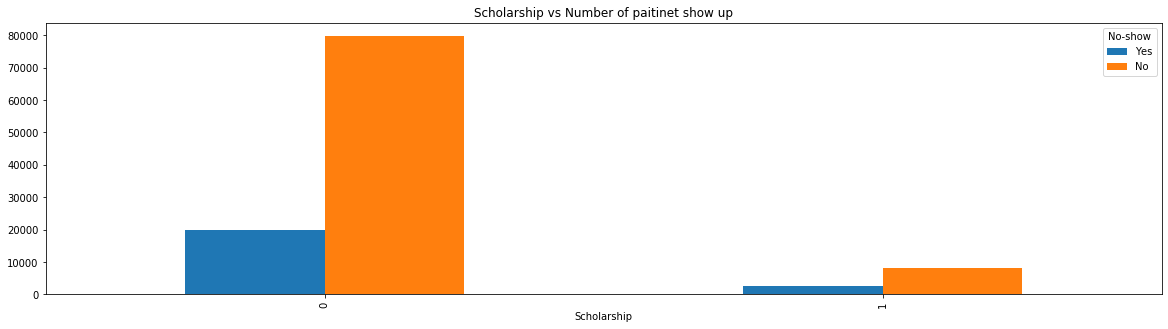

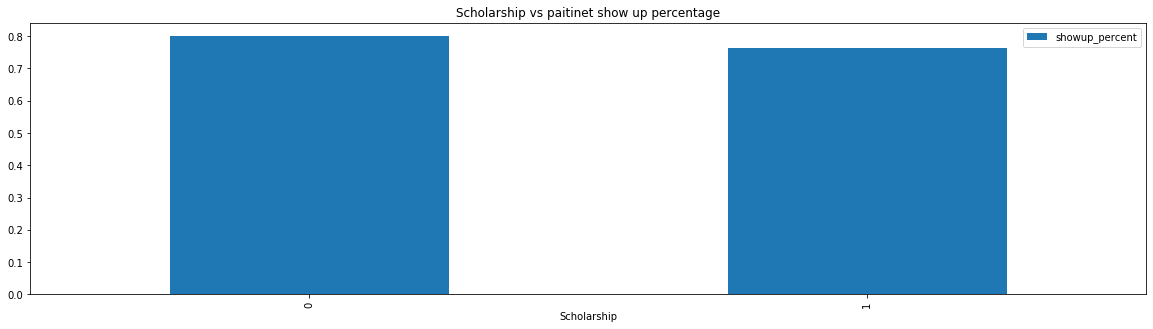

In [31]:
numShowUp(cleaned,'Scholarship','bar')
probShowUp(cleaned,'Scholarship','bar')

### Question 4: Does Alcoholismaffect patient absense?
The show up percentage does not vary much between two groups of alcoholism. Also the total number of the alcoholism sample are relatively small compares to non-alcoholism samples. So the scholarship metric may not be an indicator as well to predict if a patient will show up.

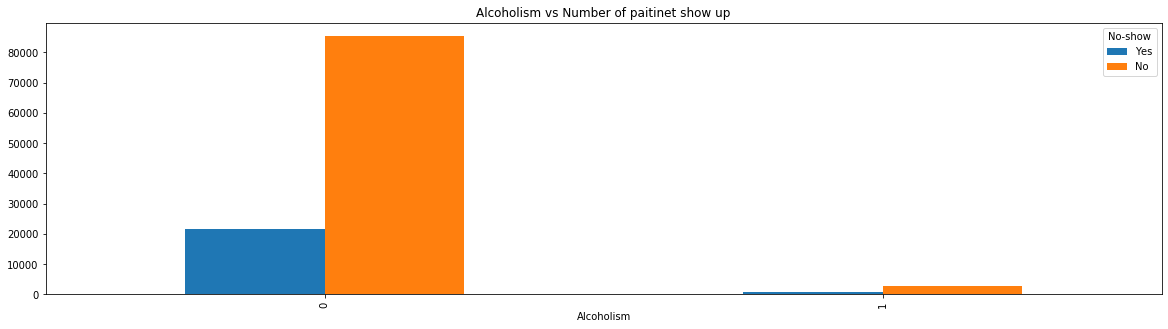

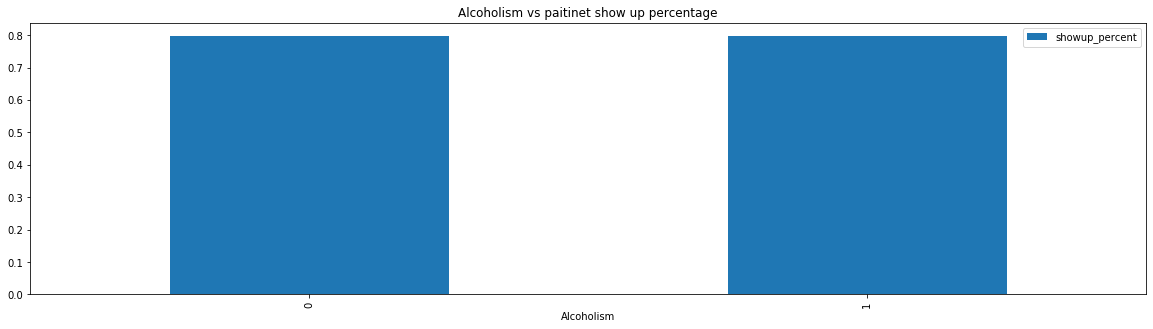

In [32]:
numShowUp(cleaned,'Alcoholism','bar')
probShowUp(cleaned,'Alcoholism','bar')

### Question 5: Does handcap level impacts the number of absense?

From the charts we clearly see that the show up percentage are different among different handcap levels. Higher handcap level patient has lower show up rate, which means handcap could be an indicator to predict if a patient will show up.

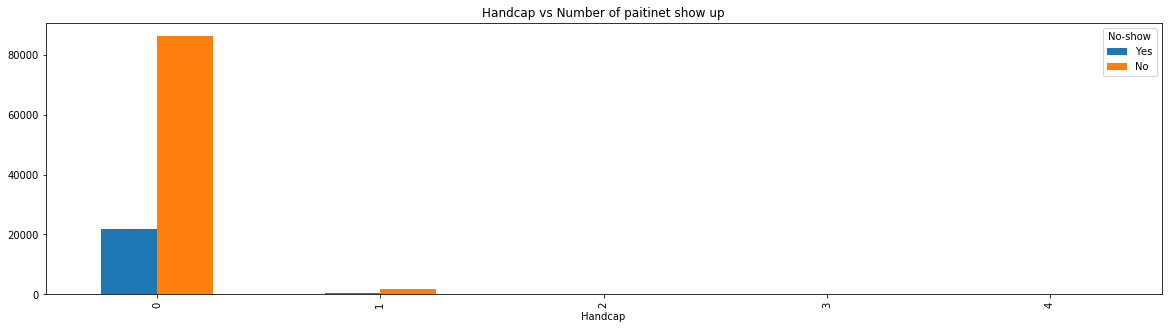

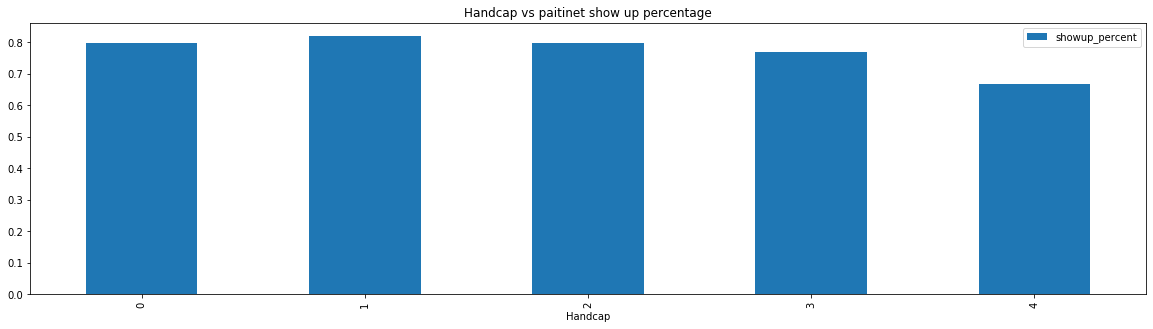

In [33]:
numShowUp(cleaned,'Handcap','bar')
probShowUp(cleaned,'Handcap','bar')

### Question 6: Do SMS reminders actually decrease the number of absences?

From the charts we can see a distinction between two SMS received group in appointment show up percentage. So this metric could be an important metric for prediction.

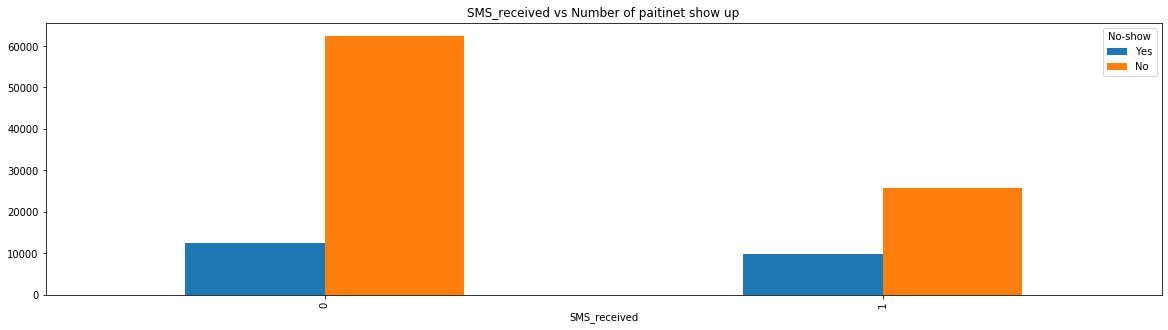

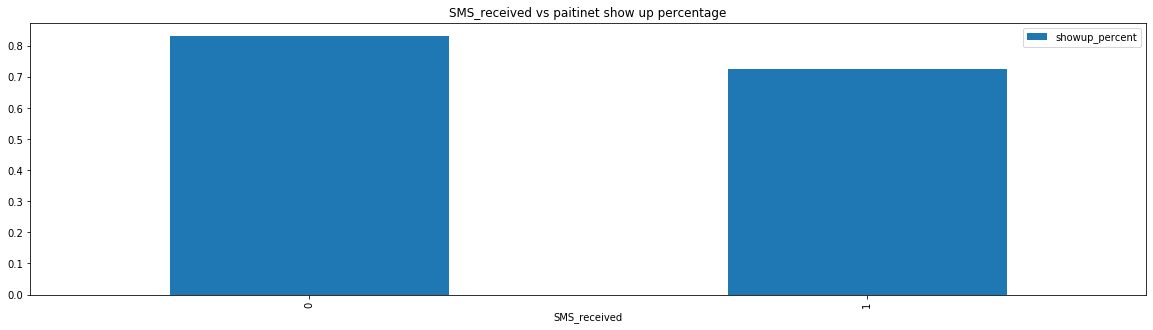

In [34]:
numShowUp(cleaned,'SMS_received','bar')
probShowUp(cleaned,'SMS_received','bar')

### Question 7: Are chronic illnesses like hypertension and diabetes affecting patient's absences?
### Diabetes

The data shows patients with diabetes has higher appointment show up percentage. So diabetes is also a metric can help determind whether patient will show up or not.

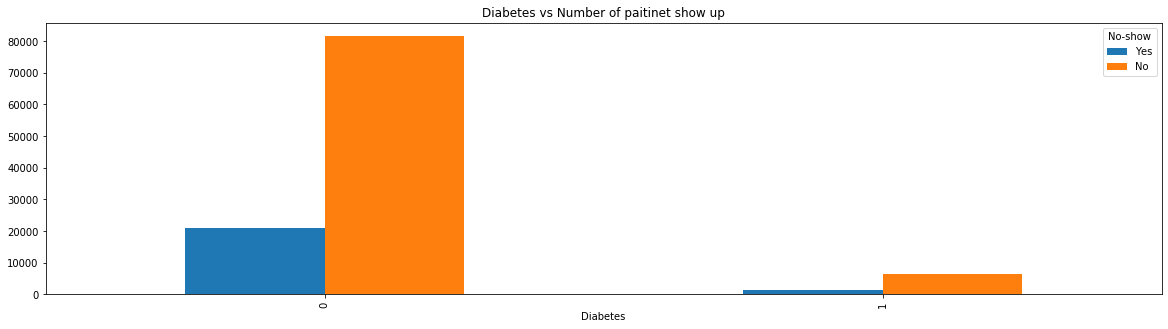

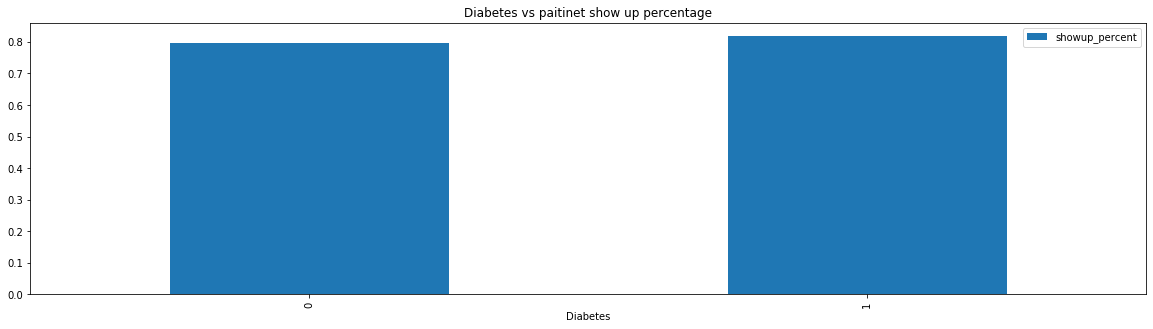

In [35]:
numShowUp(cleaned,'Diabetes','bar')
probShowUp(cleaned,'Diabetes','bar')

### Hipertension

The data shows patients with hipertension also has higher appointment show up percentage. So hipertension is also a metric can help determind whether patient will show up or not.

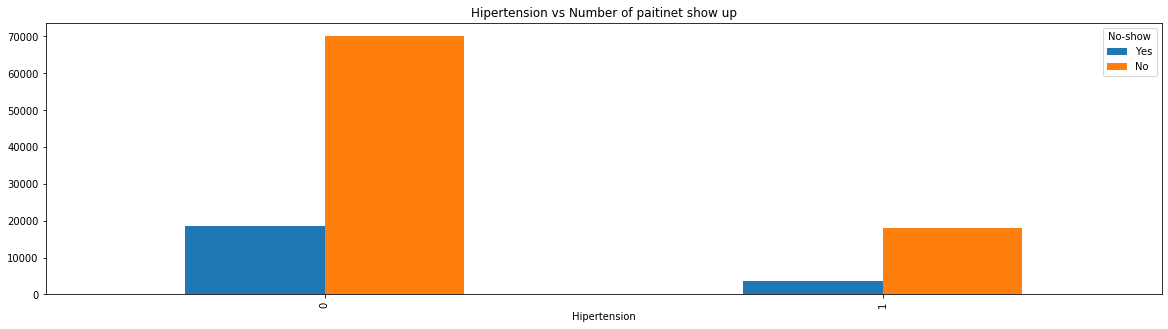

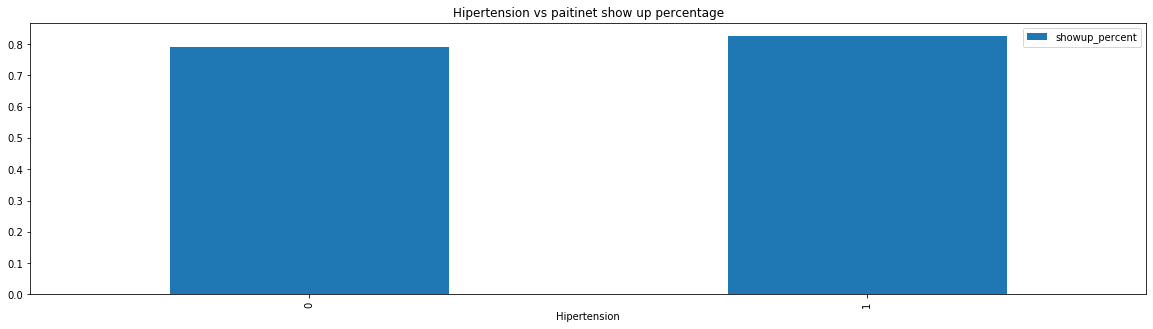

In [36]:
numShowUp(cleaned,'Hipertension','bar')
probShowUp(cleaned,'Hipertension','bar')

<a id='conclusions'></a>
## Conclusions


**Results**: Our dataset suggest that

1. There is no big difference in patient absense for different day of week 
2. There's no clear pattern between age and number of appointment absense. However, the appointment show up rate increase as age increase, which can indicate age may be an indicator that affects show up rate.
3. Patient who participate in scholarship program actually has ~5% lower appointment show up rate.
4. No clear pattern to show Alcoholism actually affects patient absense
5. People with handcap are less likely to show up in appointments, it has lower appointment show up rate.
6. People who needs SMS reminder actually has lower appointment show up rate compares to people without SMS reminder.
7. People with chronic illnesses like hypertension and diabetes are more likely to show up in the appointment.

**Limitations**:
    1. The conclusion above based on descriptive statistics, not inferential statistics, there are no experimental between two different group to draw the conclusion
    2. There's no causual analysis or correlation analysis since all data are categorical.
    3. Some subgroup has really small number of samples to draw significant or further meaningful conclusion.